In [1]:
import numpy as np

In [2]:
import sklearn

### Сначала будем генерировать выборки

Проверим формулы, которые вывели для одномерного и многомерного нормального распределения. Для этого сгенериурем выборку, а затем оценим по ней параметры и сравним с исходными.

In [10]:
sample = np.random.normal(loc=1, scale=5, size=100)
mean = sample.mean()
scale = sample.var()

In [11]:
mean, np.sqrt(scale)

1.29504115064 4.69066417971


Сравним результаты для выборок разных размеров:

In [9]:
for n in [100, 1000, 10000]:
    sample = np.random.normal(loc=1, scale=5, size=n)
    print(sample.mean(), np.sqrt(sample.var()))

1.2593079621314864 4.423603688085923
1.0723361686163166 5.028148582598959
0.899683554052093 4.97297662062504


Теперь то же самое для многомерного нормального распределения:

In [13]:
mean = np.array([5, 10])
cov = np.array([[1, 0.5], [0.5, 1]])
sample = np.random.multivariate_normal(mean=mean, cov=cov, size=1000)

np.cov(sample.T), sample.mean(axis=0)

(array([[1.09396495, 0.61535472],
        [0.61535472, 1.06743014]]),
 array([ 4.99795716, 10.00385598]))

In [14]:
mean = np.array([9, 5])
cov = np.array([[15, 10], [10, 15]])
sample1 = np.random.multivariate_normal(mean=mean, cov=cov, size=1000)

Многомерное нормальное распределение представляет собой облако точек в пространстве; на плоскости это выглядит как овал. За его вытянутость и форму отвечает матрица ковариаций, а за центр --- среднее.

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

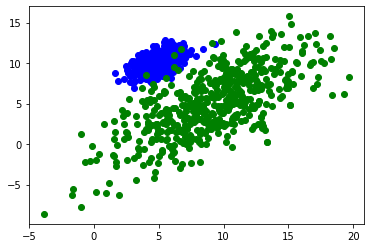

In [16]:
plt.plot(sample[:500, 0], sample[:500, 1], "bo")
plt.plot(sample1[:500, 0], sample1[:500, 1], "go")

Если объекты выборки образуют такие же отличимые облака в пространстве признаков, то нормальный байесовский классификатор будет очень хорошо работать на данной задаче.

### Применяем NB  к классификацици цифр

In [40]:
# импортируем классификатор
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [41]:
# загружаем данные --- изображения цифр
from sklearn.datasets import load_digits
data = load_digits()

In [42]:
X = data.images
y = data.target

In [43]:
X[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Посмотрим, что у нас за данные (нарисуем несколько изображений)

[0 1 2 3 4]


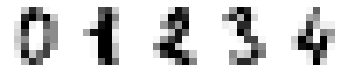

In [44]:
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X[i], cmap="Greys", interpolation="none")
    plt.axis("off")
print(y[:5])

Мы видим, что у нас в выборке представлены пиксели изображений с цифрами, вытянутые в один вектор, а сами цифры, им соответствующие, в том же порядке записаны в целевом векторе y (и их конечное число --- 10). Нам надо предсказывать, какая цифра изображена, то есть решать задачу классификации.

In [45]:
X.shape

(1797, 8, 8)

In [46]:
X = X.reshape(X.shape[0], -1) # вытягиваем квадратное изображение в вектор, чтобы получить матрицу объекты-признаки

In [47]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Разделим выборку на обучение и контроль:

In [48]:
from sklearn.utils import shuffle

In [49]:
X, y = shuffle(X, y)

In [50]:
X.shape, y.shape # проверяем, что все хорошо перемешалось

((1797, 64), (1797,))

In [51]:
X_train, y_train = X[:1000, :], y[:1000]
X_test, y_test = X[1000:, :], y[1000:]

In [52]:
# Обучаем классификатор и делаем предсказания
clf = GaussianNB()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

In [53]:
# Вычисляем простейшую метрику качества алгоритма --- долю правильных ответов
np.mean(y_test==y_predicted)

0.8444165621079046

In [55]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

print(np.mean(y_test==y_predicted))

0.8958594730238394
